In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Leer la imagen

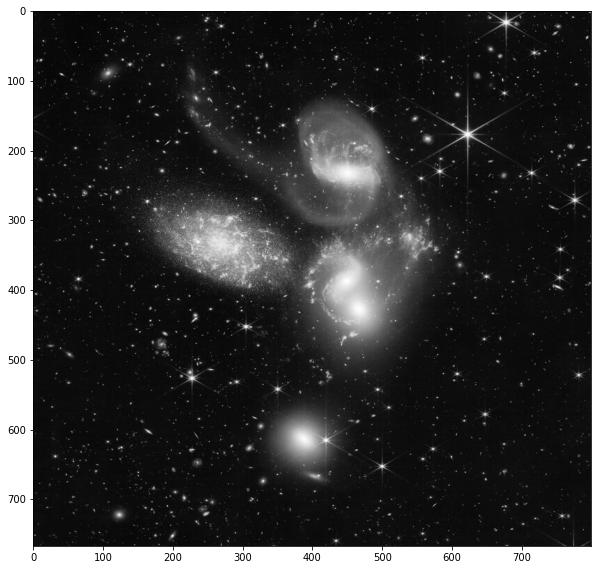

In [6]:
# leer imagen
img = cv2.imread('../imagenes/james_webb_3.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

## 2. Filtro gaussiano de ruido

In [7]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))

    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)

    return newImg 

## 3 Derivada en X

In [20]:
def derivada_x(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    derivada = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]])
    img2 = convolutional_filter(img, kernel)

    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derivada[i, j] = img2[i, j+1] - img2[i, j]

    return derivada



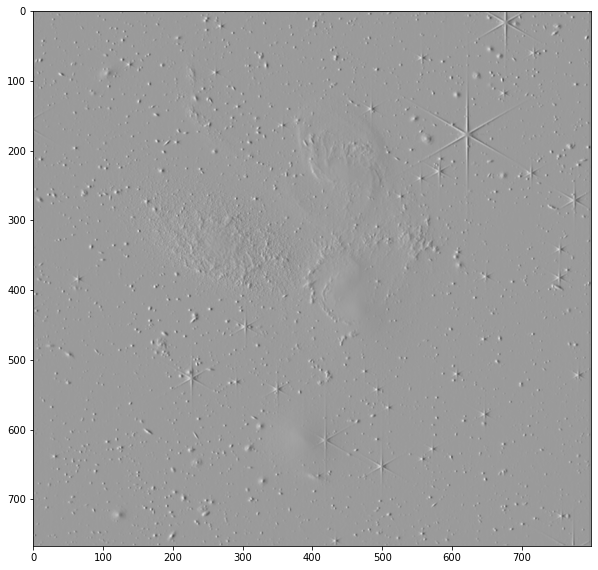

In [17]:
img_derivada_x = derivada_x(img)


plt.figure(figsize=(10, 10))
plt.imshow(img_derivada_x, cmap='gray')

## 4 Derivada en Y

In [19]:
def derivada_y(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    derivada = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]])
    img2 = convolutional_filter(img, kernel)

    for i in range(0, alto-1):
        for j in range(0, ancho):
            derivada[i, j] = img2[i+1, j] - img2[i, j]

    return derivada


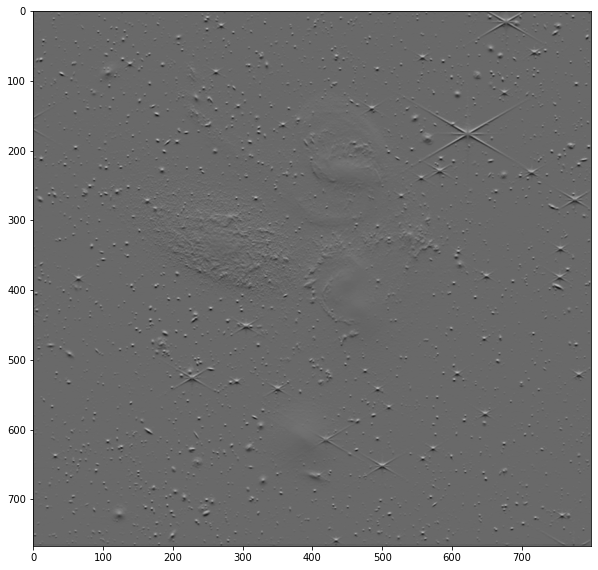

In [22]:
img_derivada_y = derivada_y(img)


plt.figure(figsize=(10, 10))
plt.imshow(img_derivada_y, cmap='gray')

## 5 Magnitud

In [23]:
def magnitud(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    salida = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            salida[i, j] = np.sqrt(dx[i, j]**2 + dy[i, j]**2)

    return salida


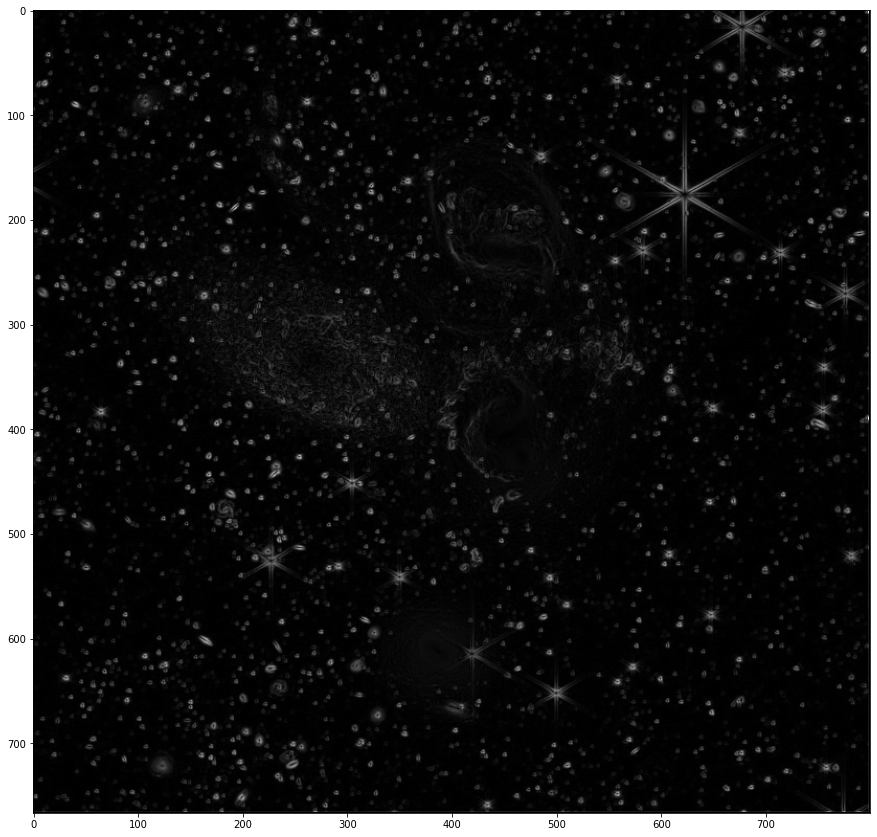

In [25]:
magnitud_img = magnitud(img_derivada_x, img_derivada_y)

plt.figure(figsize=(15, 15))
plt.imshow(magnitud_img, cmap='gray')

## 6 Fase

In [28]:
def fase(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    salida = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            salida[i, j] = int((180/math.pi)*(math.atan2(dy[i,j], dx[i,j])))

    return salida

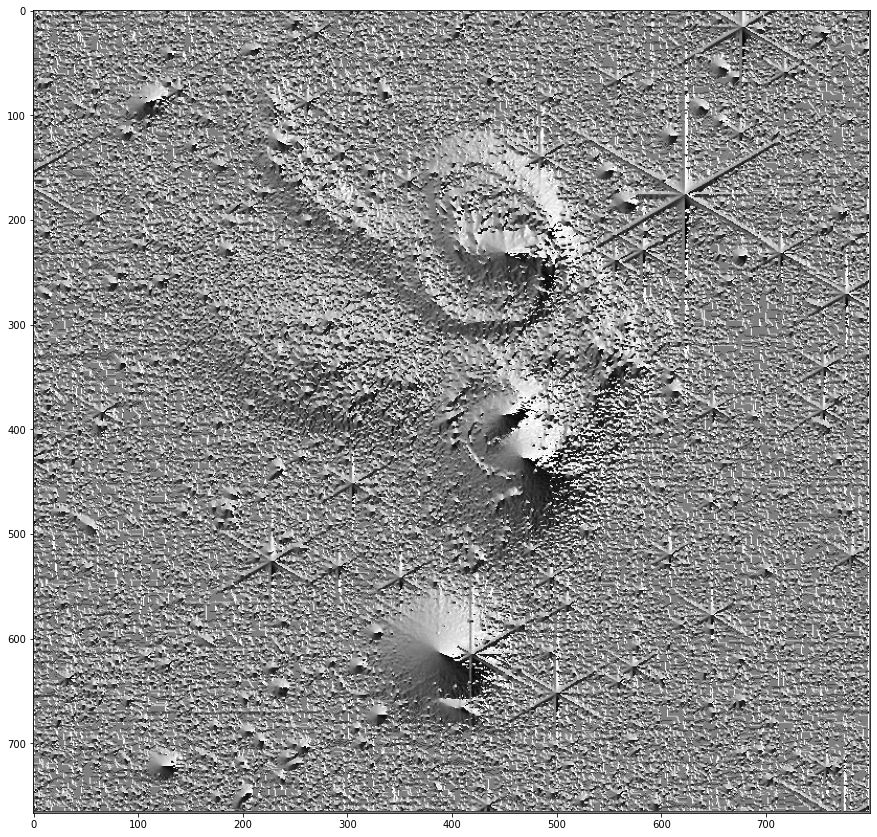

In [29]:
img_fase = fase(img_derivada_x, img_derivada_y)

plt.figure(figsize=(15, 15))
plt.imshow(img_fase, cmap='gray')